# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()

# Combine the data into a single DataFrame
cap_study=pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
cap_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice
mouse_count = cap_study['Mouse ID'].value_counts()
len(mouse_count)

249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
## Our data should be uniquely identified by Mouse ID and Timepoint

#find the duplicate mouse ID
cap_study['Mouse ID'].value_counts() 
##array(['g989'], dtype=object)

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice= cap_study.loc[cap_study['Mouse ID']== 'g989', :]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_row = cap_study['Mouse ID'] == 'g989'
cap_study.drop(index = cap_study[remove_row].index, inplace=True)
#checking to see if removed
cap_study.loc[cap_study['Mouse ID']== 'g989', :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = cap_study['Mouse ID'].value_counts()
len(mouse_count)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

sum_stats = cap_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std'])
sum_stats

,mean,median,var,std
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
sum_stats = cap_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std'])
sum_stats

,mean,median,var,std
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of observed Mouse Timepoints'>

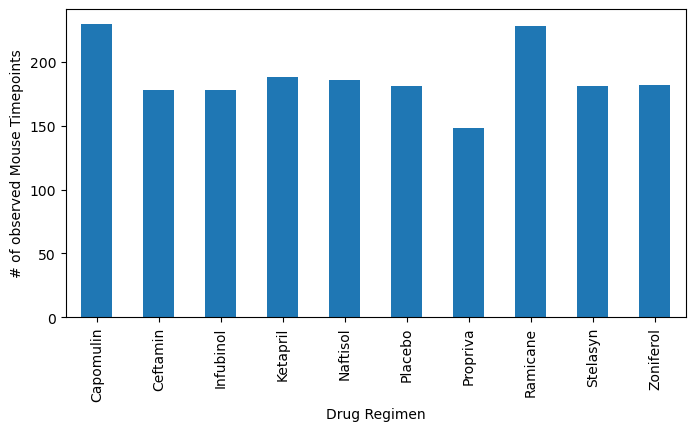

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_id_time = cap_study.groupby('Drug Regimen')['Timepoint'].count()
clean_id_time
clean_id_time.plot(kind='bar', figsize=(8,4), xlabel= 'Drug Regimen', ylabel='# of observed Mouse Timepoints')

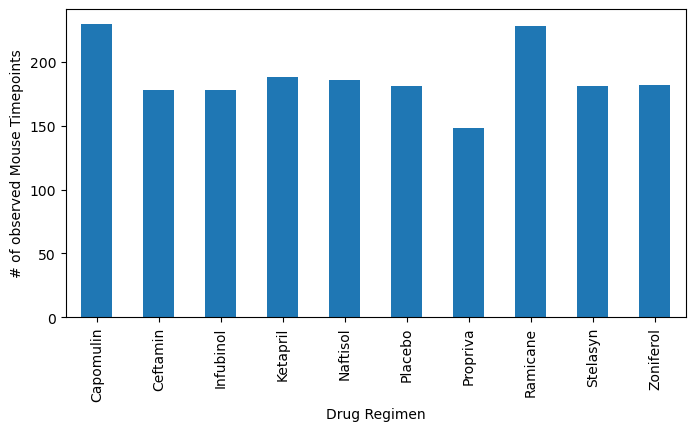

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot (matplotlib.
# Use DataFrame.plot() in order to create a bar chart of the data
clean_id_time.plot(kind="bar", figsize=(8,4))
plt.ylabel("# of observed Mouse Timepoints")
plt.show()



<Axes: ylabel='Sex'>

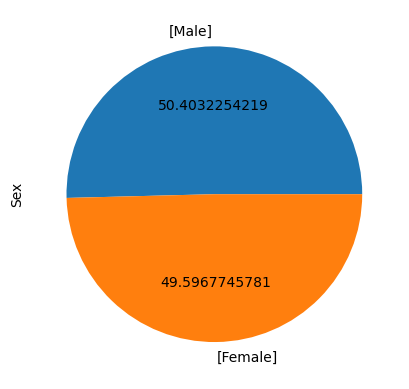

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

total_count = cap_study.groupby('Mouse ID')['Sex'].unique() 
total= total_count.value_counts() 
#total  Output = Male] 125, [Female] 123   Name: Sex, dtype: int64 
total.plot(kind='pie', y='Sex', autopct='%.10f')

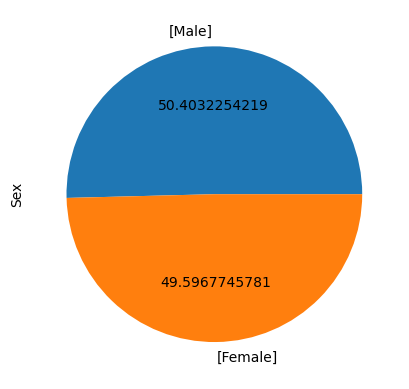

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
total.plot(kind="pie", autopct='%.10f')
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
group4=cap_study
remove_row=group4['Drug Regimen']== 'Ketapril'
group4.drop(index = group4[remove_row].index, inplace = True)
remove_row=group4['Drug Regimen']== 'Naftisol'
group4.drop(index = group4[remove_row].index, inplace = True)
remove_row=group4['Drug Regimen']== 'Placebo'
group4.drop(index = group4[remove_row].index, inplace = True)
remove_row=group4['Drug Regimen']== 'Propriva'
group4.drop(index = group4[remove_row].index, inplace = True)
remove_row=group4['Drug Regimen']== 'Stelasyn'
group4.drop(index = group4[remove_row].index, inplace = True)
remove_row=group4['Drug Regimen']== 'Zoniferol'
group4.drop(index = group4[remove_row].index, inplace = True)
#check if actually removed
group4.loc[group4['Drug Regimen']== 'Zoniferol', :]

group4.head()

# Start by getting the last (greatest) timepoint for each mouse
#mouse_list = group4['Mouse ID'].unique() 

#sum_stats = cap_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg('max') 
#sum_stats
#--------------------------------------
#Drug Regimen 
#Capomulin 48.158209 
#Ceftamin 68.923185
#Infubinol    72.226731
#Ramicane     47.622816
#Name: Tumor Volume (mm3), dtype: float64
#----------------------------------------
#group4['Mouse ID']
#for x in mouse_list:

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
29,c326,0,45.0,0,Infubinol,Female,18,25
30,c139,0,45.0,0,Infubinol,Male,11,28
31,v339,0,45.0,0,Infubinol,Male,20,26
32,a577,0,45.0,0,Infubinol,Female,6,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
